In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
from math import sqrt, acos, cos
import matplotlib.pyplot as plt
from scipy.optimize import leastsq, curve_fit
from math import pi

In [2]:
# opening the files and load them into pandas data frames:
file_path = './'
df_ee = pd.read_hdf(file_path + 'z0_mc_ee.h5')
df_mm = pd.read_hdf(file_path + 'z0_mc_mm.h5')
df_tt = pd.read_hdf(file_path + 'z0_mc_tt.h5')
df_qq = pd.read_hdf(file_path + 'z0_mc_qq.h5')
df_data1 = pd.read_hdf(file_path + 'z0_data1.h5')
df_data2 = pd.read_hdf(file_path + 'z0_data2.h5')
df_data3 = pd.read_hdf(file_path + 'z0_data3.h5')
df_data4 = pd.read_hdf(file_path + 'z0_data4.h5')
df_data5 = pd.read_hdf(file_path + 'z0_data5.h5')
df_data6 = pd.read_hdf(file_path + 'z0_data6.h5')
df_data7 = pd.read_hdf(file_path + 'z0_data7.h5')

- for now forget about the files labled 'dataN'
- focus on those four files ee, mm, tt, qq
- those are files with electrons (and positrons), muons (and anti-muons), taus (and anti-taus) and quarks (and anti-quarks) as decay products
- they are stored in so-called data frames
- data frames are 2dim tables (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
- the next few cells show you how to use data frames

In [3]:
# inspect the frames:
df_mm.head()

,acol,cos_thrust,cos_thrust_neg,cos_thrust_pos,d0_mean,e_ecal,e_hcal,e_lep,event,n_charged,n_ecal,n_muons,p_charged,phi_thrust,run,thrust,z0_mean
0,0.155289,-0.589417,-0.588505,0.590264,0.015180,28.669762,7.166273,45.624001,1,2,3,2,63.770088,234.055801,1602,0.999725,-0.017415
1,0.303986,0.904068,0.905180,-0.902914,0.007920,6.565208,13.279085,45.624001,2,2,2,1,87.261551,58.205193,1602,0.999865,-1.051628
2,-999.000000,0.972364,-999.000000,-999.000000,0.000000,1.213779,8.500000,45.624001,3,0,1,2,0.000000,20.558077,1602,1.000000,0.000000
3,0.020996,-0.280547,-0.280719,0.280375,0.018727,1.104645,6.259569,45.624001,4,2,2,2,89.692673,-94.230476,1602,1.000000,0.181963
4,0.009750,0.558759,0.558685,-0.558837,0.006241,1.507646,9.535446,45.624001,5,2,2,1,90.301788,53.563972,1602,1.000000,-1.529448


**acol**: angle between thrust_pos and thrust_neg

**thrust**: momentum weighted mean direction of all tracks

**cos_thrust**: cosine of angle between thrust axis and beam axis

**phi_thrust**: phi angle of thrust axis

**cos_thrust_neg/pos**: see above but for fermion/anti-fermion

**d0_mean**: mean distance of all tracks to the dectector center in r-phi-plane

**z0_mean**: mean distance of all tracks to the dectector center along z axis (beam axis)

**e_ecal**: energy in ECAL (in GeV)

**e_hcal**: energy in HCAL (in GeV)

**e_lep**: LEP beam energy (in GeV)

**event**: event number

**run**: run number

**n_charged**: number of charged particles (number of tracks)

**n_ecal**: number of entries (hits) in the ECAL

**n_muons**: number of muons found

**p_charged**: scalar sum of all momenta based on tracks found


In [4]:
# add a column:
df_mm['E'] = df_mm.e_ecal + df_mm.e_hcal
df_mm.head()

,acol,cos_thrust,cos_thrust_neg,cos_thrust_pos,d0_mean,e_ecal,e_hcal,e_lep,event,n_charged,n_ecal,n_muons,p_charged,phi_thrust,run,thrust,z0_mean,E
0,0.155289,-0.589417,-0.588505,0.590264,0.015180,28.669762,7.166273,45.624001,1,2,3,2,63.770088,234.055801,1602,0.999725,-0.017415,35.836035
1,0.303986,0.904068,0.905180,-0.902914,0.007920,6.565208,13.279085,45.624001,2,2,2,1,87.261551,58.205193,1602,0.999865,-1.051628,19.844293
2,-999.000000,0.972364,-999.000000,-999.000000,0.000000,1.213779,8.500000,45.624001,3,0,1,2,0.000000,20.558077,1602,1.000000,0.000000,9.713779
3,0.020996,-0.280547,-0.280719,0.280375,0.018727,1.104645,6.259569,45.624001,4,2,2,2,89.692673,-94.230476,1602,1.000000,0.181963,7.364214
4,0.009750,0.558759,0.558685,-0.558837,0.006241,1.507646,9.535446,45.624001,5,2,2,1,90.301788,53.563972,1602,1.000000,-1.529448,11.043092


<AxesSubplot:>

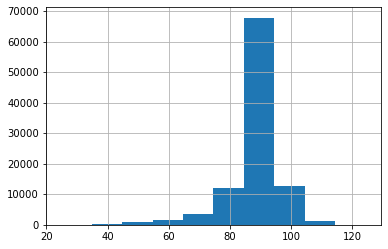

In [5]:
# simple histogram
df_ee['e_ecal'].hist()

<AxesSubplot:>

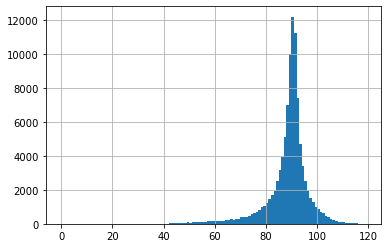

In [6]:
#change the binning
bin_list = [0 + i  for i in range(120)]
df_ee['e_ecal'].hist(bins=bin_list)

<AxesSubplot:>

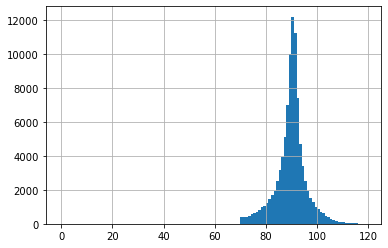

In [7]:
# use selection
df_ee.e_ecal[df_ee.e_ecal > 70].hist(bins=bin_list)

<AxesSubplot:>

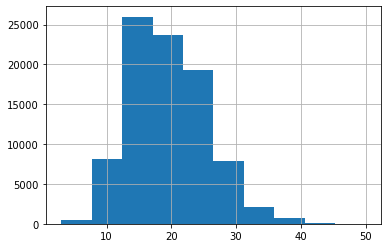

In [8]:
# use complex expressions:
cut = 'abs(cos_thrust) < 0.9 and n_charged > 2'
df_qq.query(cut).n_charged.hist()

In [9]:
# find 4 selection criteria/filter: (dummies in this example)
cut_ee = 'abs(cos_thrust) < 0.9'
cut_mm = 'abs(cos_thrust) < 0.9 and n_muons < 3'
cut_tt = 'abs(cos_thrust) < 0.9 and n_charged > 4 and n_charged < 14'
cut_qq = 'abs(cos_thrust) < 0.9 and n_charged > 10'

In [10]:
#calculate filter efficiencies:

# a little helper function to make it a litte more readable

def ratio(numerator, denominator=100000):
    return numerator / denominator

# applying the electron filter
eff_ee = ratio( len(df_ee.query(cut_ee)) )
eff_me = ratio( len(df_mm.query(cut_ee)) )
eff_te = ratio( len(df_tt.query(cut_ee)) )
eff_qe = ratio( len(df_qq.query(cut_ee)) )

# applying the muon filter
eff_em = ratio( len(df_ee.query(cut_mm)) )
eff_mm = ratio( len(df_mm.query(cut_mm)) )
eff_tm = ratio( len(df_tt.query(cut_mm)) )
eff_qm = ratio( len(df_qq.query(cut_mm)) )

# applying the tau filter
eff_et = ratio( len(df_ee.query(cut_tt)) )
eff_mt = ratio( len(df_mm.query(cut_tt)) )
eff_tt = ratio( len(df_tt.query(cut_tt)) )
eff_qt = ratio( len(df_qq.query(cut_tt)) )

# applying the hadron filter
eff_eq = ratio( len(df_ee.query(cut_qq)) )
eff_mq = ratio( len(df_mm.query(cut_qq)) )
eff_tq = ratio( len(df_tt.query(cut_qq)) )
eff_qq = ratio( len(df_qq.query(cut_qq)) )



In [11]:
# quick example of how matrices and vectors work in numpy
m = np.matrix([[1, 2],[3,4]])
v = np.array([5, 6])
v_t = np.transpose(v)

print(m.dot(v))
print(v.dot(m))


[[17 39]]
[[23 34]]


In [12]:
# invert efficiency matrix
eff_M = np.matrix([[eff_ee, eff_me, eff_te, eff_qe],\
                   [eff_em, eff_mm, eff_tm, eff_qm],\
                   [eff_et, eff_mt, eff_tt, eff_qt],\
                   [eff_eq, eff_mq, eff_tq, eff_qq]])


eff_M_inv = np.linalg.inv(eff_M)
eff_M_inv

matrix([[-1.76136567e+04,  1.76159079e+04, -1.72128398e+01,
          1.86176972e+01],
        [ 8.94282537e+03, -8.94280509e+03, -7.41889154e+00,
         -8.33713247e+00],
        [ 3.29797946e+02, -3.29843106e+02,  1.65226481e+01,
         -2.67424522e+00],
        [-2.25492236e-01,  2.25523113e-01, -1.12970044e-02,
          1.18067060e+00]])

In [13]:
# get numbers from data

# make life a little easier with 
def get_filtered_data_events(cut):
    data_sets = [df_data1, df_data2, df_data3, df_data4, df_data5, df_data6, df_data7]
    filtered_events = []
    for ds in data_sets:
        n = len(ds.query(cut))
        filtered_events.append(n)
    return filtered_events
        
        

#electron filter
n_ee = get_filtered_data_events(cut_ee)

#muon filter
n_mm = get_filtered_data_events(cut_mm)

#electron filter
n_tt = get_filtered_data_events(cut_tt)

#electron filter
n_qq = get_filtered_data_events(cut_qq)


In [14]:
#we have now the selected data events
#selected by our filter/cuts
#results are stored in a list of length seven (seven datasets)

#next up is to apply the inverse matrix
#N0 = M^(-1) * N_selected

#loop over all 7 data sets

n0_ee = []
n0_mm = []
n0_tt = []
n0_qq = []

for i in range(7):
    #put together N_selected vector:
    n_selected_v = np.array([n_ee[i], n_mm[i], n_tt[i], n_qq[i]])
    
    #multiply with inverse matrix:
    n0_v = np.array(eff_M_inv.dot(n_selected_v))[0]
   
    #put electron events to eletectron vector, muon events to muon vector, ...
    n0_ee.append(n0_v[0])
    n0_mm.append(n0_v[1])
    n0_tt.append(n0_v[2])
    n0_qq.append(n0_v[3])

In [15]:
# eventually calculate cross_sections

luminosities = [1303.1, 1394.2, 1265.2, 7901.2, 1312.2, 1356.1, 1493.2]

# convert lists to numpy arrays to benefit from division by element

luminosities = np.array(luminosities)
n0_ee = np.array(n0_ee)
n0_mm = np.array(n0_mm)
n0_tt = np.array(n0_tt)
n0_qq = np.array(n0_qq)

sigma_ee = n0_ee / luminosities
sigma_mm = n0_mm / luminosities
sigma_tt = n0_tt / luminosities
sigma_qq = n0_qq / luminosities

# at this point the cross sections are ready to be plotted

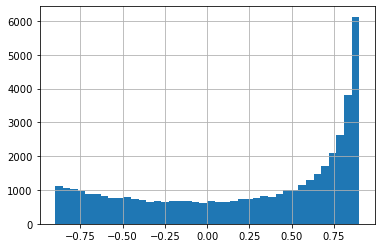

In [16]:
# now let's have a look at the s-channel electron fit
# first we create a histogram for the electrons:
# the region around 0 is assumed to follow a parabola

hist = df_ee.query(cut_ee).cos_thrust.hist(bins=40)

In [17]:
# in order to fit the data we need to extract the data from the histrogram
# here is a little helper function that does that for us

def get_hist(ax):
    n,bins, err = [],[],[]
    for rect in ax.patches:
        ((x0, y0), (x1, y1)) = rect.get_bbox().get_points()
        # in which region do you want to do the fit
        if (abs(x0) < 0.4):   
            n.append(y1-y0)
            bins.append(x0 + (x1 - x0) / 2.0) # bin center
            err.append(sqrt(y1-y0))

    return n, bins, err

In [18]:
# the x data, y data and the corresponding uncertainties are now avaible in the following arrays/lists
y_data, x_data, y_err = get_hist(hist)
x_data = np.array(x_data)
y_data = np.array(y_data)
y_err = np.array(y_err)


In [19]:
# the function that we want to fit is of quadratic nature

def quadratic_func(x, a, b):
    return  a + b * x ** 2



In [20]:
curve_fit(quadratic_func, x_data, y_data, [630, 50])

(array([647.02128861, 845.32447124]),
 array([[  250.23992352, -2805.86881238],
        [-2805.86881238, 57142.29800358]]))

In [21]:
# the first list/array is the optimal set of parameters: 647 and 845
# you can verify the fit by looking at the histogram:

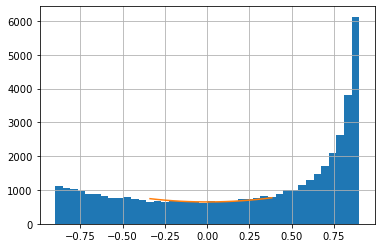

In [22]:
hist = df_ee.query(cut_ee).cos_thrust.hist(bins=40)
plt.plot(x_data, quadratic_func(x_data, 647, 845))

In [24]:
# up next: BW fit

In [29]:
def breit_wigner(x, par):
    return par[0]*x*x*par[2]*par[2]/((x*x-par[1]*par[1])**2+(x**4*par[2]**2)/par[1]**2)

def breit_wigner_corrected(x, par):
    bw = par[0]*x*x*par[2]*par[2]/((x*x-par[1]*par[1])**2+(x**4*par[2]**2)/par[1]**2)
    
    conv  = 389387
    sw    = 0.23
    qfgvf  = 2.* 2./3.*(0.5- 2.*sw* 2./3.) + 3.*(-1./3.)*((-0.5)- 2.*sw*(-1./3.));
    qsum   = 11./9.;

    ncolor = 3.
    aQED  = 1./128.9
    
    return bw + conv * 4./3.*math.pi*qsum*ncolor*aQED**2/x**2

In [1]:
bwfit =  par[0]*x*x*par[2]*par[2]/((x*x-par[1]*par[1])**2+(x**4*par[2]**2)/par[1]**2)
# QED and hadronic corrections:
 
conv  = 389387
sw    = 0.23
qfgvf  = 2.* 2./3.*(0.5- 2.*sw* 2./3.) + 3.*(-1./3.)*((-0.5)- 2.*sw*(-1./3.));
qsum   = 11./9.;

ncolor = 3.
aQED  = 1./128.9

bwfit_cor = bwfit + conv * 4./3.*PI*qsum*ncolor*aQED**2/x**2


NameError: name 'par' is not defined